# Homework 1 (HW1)

---
By the end of this homework we expect you to be able to:
1. Load data from different formats using [pandas](https://pandas.pydata.org/);
2. Navigate the documentation of Python packages by yourself;
3. Filter and tidy up noisy data sets;
4. Aggregate your data in different (and hopefully helpful) ways; 
5. Create meaningful visualizations to analyze the data;
6. Critically think and write about data;
---

## Important Dates

- Homework release: Fri 8 Oct 2021
- **Homework due**: Fri 22 Oct 2021, 23:59
- Grade release: Fri 29 Oct 2021

---

##  Some rules

1. You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, 
you may do so, but must justify your choice.
2. Make sure you use the `data` folder provided in the repository in read-only mode. (Or alternatively, be sure you 
don’t change any of the files.)
3. Be sure to provide a textual description of your thought process, the assumptions you made, the solution you 
implemented, and explanations for your answers. A notebook that only has code cells will not suffice.
4. For questions containing the **/Discuss:/** prefix, answer not with code, but with a textual explanation
 (**in markdown**).
5. Back up any hypotheses and claims with data, since this is an important aspect of the course.
6. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a 
single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, 
we will **not grade** anything.
7. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results 
contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. 
Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended,
 you can check the rendered notebook on the GitHub website once you have pushed your solution there.
8. In continuation to the previous point, interactive plots, such as those generated using `plotly`, should be 
**strictly avoided**!
9. Make sure to print results or dataframes that confirm you have properly addressed the task.

---

## Context

In this project, we are going to analyze data from an experiment about *honesty*. 
Oftentimes, we are asked to confirm our honest intentions by signing **at the end** of a document. 
For example, in tax returns or insurance policy forms, we are often asked to sign our names under a text that reads 
something like "I hereby certify that the above statements are true and correct to the best of my knowledge."

However, when individuals sign **after** lying in the form, they may not feel the need to correct the falsehoods they 
have reported. In that context, it could be that signing at **the beginning** rather than at the end of the document 
would decrease dishonesty, as those who are filling the form would be aware of the ethical requirements *before* they 
provide the information in the form.

This intuition has led researchers to partner up with a motorcycle insurance company to run a randomized experiment. 
In this insurance company (as well as in many others), customers had to report the exact *odometer kilometrage*¹ in 
order for the company to adjust the insurance premiums. Note that motorcycles with lower kilometrage are less likely to 
have issues, and thus will result in a lower *insurance premium*². Therefore, customers have an incentive to lie, 
reporting a kilometrage lower than the real value, in order to save money.

In the experiment, two different forms were created: one where the signing was done at the end, and another where the 
signing was done at the beginning. The insurance company then randomized these forms (i.e., each customer received
 exactly one form, each with probability 50%) and sent back the data that customers had provided. Some noteworthy 
 details on the experiment are that:

- All customers involved in the experiment already had a contract with the company and were simply renewing it. 
In the data that the company provided, they also report the odometer kilometrage for their previous contract.
Each policy, therefore, contains two contracts: the "updated" contract —where the experiment was conducted— and 
the "baseline" contract, which was the previous contract customers had with the company.
- A single insurance policy can insure up to 4 distinct motorcycles.

In this assignment, you will take the role of the researcher and work analyzing this data!

*Glossary:*
1. **odometer kilometrage:** the total distance the motorcycle has traveled.
2. **insurance premiums:** the amount of money one pays for an insurance policy.

---

## The data

The company provided you with a compressed `.tsv` file containing one row per policy. 
The `.tsv` has the following fields:

- `condition`: either `Sign Top` or `Sign Bottom`, depending on which form was sent.
- `id`: unique identifier for each insurance policy.
- `motorcycle_count`: number of motorcycles covered by the insurance policy.
- `baseline_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *previous (baseline)* contract. 
- `update_motorcycle[1-4]`: odometer kilometrage *reported by the customer* in the *current (updated)* contract.

Some comments:

- Recall that a single policy can ensure up to 4 motorcycles, and thus, the suffixes [1-4] indicate that there are 4 
versions of these columns in the data (e.g., `baseline_motorcycle1`, `baseline_motorcycle2`, `baseline_motorcycle3`, 
`baseline_motorcycle4`). 
- When a policy has fewer than 4 motorcycles, only the columns with the smaller numerals are filled (e.g., if a policy 
insures one motorcycle,  only `baseline_motorcycle1` and `update_motorcycle1` will be filled).
- Note that we only have access to the odometer kilometrage reported by the customers, 
which may be different from the real kilometrage of the motorcycles.

In [4]:
# Imports you may need
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

### **Task 1** — 4pts

Your first task is to load the dataset into memory using pandas. 
**You should load the data directly from the compressed files.**

Here, the files at hand are rather small, and you could easily uncompress the files to disk and work with them as plain 
text. Why, then, are we asking you to load the files compressed? The reason is that, in your life as a data scientist, 
this will often not be the case. Then, working with compressed files is key so that you don't receive email from your 
(often more responsible) colleagues demanding to know how you have managed to fill the entire cluster with your 
datasets. Another big advantage of compressing files is to simply read files faster. You will often find that reading
compressed data on the fly (uncompressing it as you go), is much faster than reading uncompressed data, since reading
and writing to disk may be your [bottleneck](https://skipperkongen.dk/2012/02/28/uncompressed-versus-compressed-read/). 

---

**Hint:** `pandas` can open compressed files.

**Hint:** In the real world (and in ADA-homework), your file often comes with some weird lines! 
This time you can safely ignore them (but in the real world you must try to understand why they are there!). 
Check the `error_bad_lines` or the `on_bad_lines` (depending on your pandas version) parameter on `read_csv`.

In [5]:
DATA_FOLDER = './data/'
DATA_FILE = 'data.tsv.gz'
#As there is a error, we skip it
df = pd.read_csv(DATA_FOLDER + DATA_FILE, delimiter="\t", on_bad_lines='skip')
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [6]:
df.size

148467

### Task 2 — 12pts

As a good data scientist, the first thing you do is to clean up the data and perform some small sanity checks.

1. The motorcycle insurance company mentioned that each policy has a unique identifier, but that there may be duplicate 
rows (i.e., multiple rows with the same policy identifier). Check if there are duplicate policies and, if so, filter 
these rows from the data (always keeping the first).

2. According to the company, all policies should have kept the number of motorcycles from the previous contract (i.e., 
the number of motorcycles recorded in baseline contracts should equal the number of motorcycles in updated contracts). 
Also, the number of odometer readings for each contract should be the same as the number stated in the 
`motorcycle_count` variable. Check the data to see if these two things hold. If not, filter the anomalous rows.

3. Calculate the mean and the median value of each column related to kilometrages. Are the values obtained plausible? 
Visualize the distribution of the data and remove any extreme outliers.

4. **Discuss:** In cases where you cannot think of appropriate ways to remove outliers, would you prefer summarizing 
numerical data with outliers with the mean or the median? Why?

---

**Hint:** Here we are considering as outliers numbers that are not plausible in the context of motorcycle kilometrages.

In [7]:
#2.1 filter rows duplicated
df.drop_duplicates(subset = 'id', keep='first',inplace=True)
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
df.shape

(13488, 11)

We compare the number of raws, we can see than there was indeed some duplicated ids

In [9]:
#2.2
df['count_baseline'] =  4 - df[['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']].isna().sum(axis=1)
df['count_update'] =  4 - df[['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']].isna().sum(axis=1)
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,count_baseline,count_update
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,2,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,2,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1


we add 2 new coloms to know how many motorcycle were counted before and after the document 

In [10]:
#we check if there is anomalous row 
def check(before,after) :
    if  before.equals(after) : return True
    return False

print(check(df["count_baseline"],df["count_update"]))

True


In [11]:
check = df.apply(lambda x: x.motorcycle_count == x.count_baseline == x.count_update, axis=1)
print("There are {} anomalous row(s).".format(check[check == False].size))
df.drop(check[check == False].index, inplace=True)
df.drop(['count_baseline', 'count_update'], axis=1, inplace=True)

There are 0 anomalous row(s).


In [12]:
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1


In [13]:
#task 2.3 : 
df.mean(skipna=True, numeric_only=True)

id                      7.403514e+03
baseline_motorcycle1    7.413998e+14
update_motorcycle1      7.413998e+14
baseline_motorcycle2    6.732597e+04
update_motorcycle2      9.227763e+04
baseline_motorcycle3    6.765732e+04
update_motorcycle3      9.284941e+04
baseline_motorcycle4    6.782798e+04
update_motorcycle4      9.337428e+04
motorcycle_count        1.537589e+00
dtype: float64

In [14]:
df.median(skipna=True, numeric_only=True)

id                       6745.5
baseline_motorcycle1    56341.5
update_motorcycle1      82397.5
baseline_motorcycle2    56157.5
update_motorcycle2      82061.0
baseline_motorcycle3    58821.0
update_motorcycle3      85645.0
baseline_motorcycle4    68181.0
update_motorcycle4      93387.5
motorcycle_count            1.0
dtype: float64

watching the mean we can see for the first motorcycle we have a kilometrages too high compared to the others, it seems to be caused by some outliners as the median is similar compared to the others. 

Text(0.5, 1.0, 'kilometrage of update_motorcycle1')

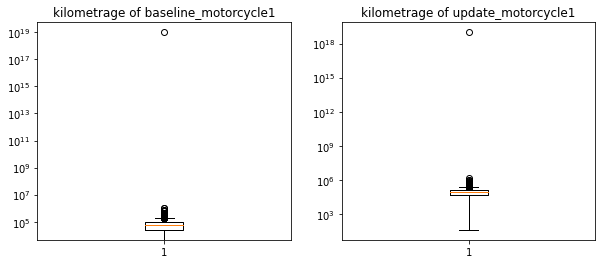

In [15]:
#we check only the first motorcycle to see the ouliners with a boxplot
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].boxplot(x=df["baseline_motorcycle1"])
ax[1].boxplot(x=df["update_motorcycle1"])
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_title("kilometrage of baseline_motorcycle1")
ax[1].set_title("kilometrage of update_motorcycle1")
#fig.tight_layout()

There is indeed a outliner for a motorcycle where the kilometrage is higher than 10^18 much more than the others. Most of the data lie around 10^5.To clean the data, we remove the outliers higher of 10^7

In [16]:
df[df['baseline_motorcycle1']>1e7]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
13228,Sign Bottom,13451,9999999999999999999,1623780,62221.0,99143.0,NaN,NaN,NaN,NaN,2


In [17]:
df[df['update_motorcycle1']>1e7]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count
91,Sign Bottom,8888888,36112,9999999999999999999,NaN,NaN,NaN,NaN,NaN,NaN,1


In [18]:
df.drop(df[df['baseline_motorcycle1']>1e7].index,inplace=True)
df.drop(df[df['update_motorcycle1']>1e7].index,inplace=True)

In [19]:
df[df['update_motorcycle1']>1e7]

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count


### Task 3 — 12pts

One of the challenges with the current data is that it is not clear how to handle policies with multiple motorcycles.

1. Create three additional columns in the dataframe, `baseline_average`, `update_average`, and `diff_average`. These 
should contain, respectively, the average value for `baseline_motorcycle[1-4]` for all motorcycles insured; the average
 value for `update_motorcycle[1-4]`; and the difference between the average updated value and the average baseline 
 value.
2. **Discuss:** Propose another way of aggregating distinct motorcycles from a single policy. Point out a way in which 
this aggregation may be either better or worse than taking the average for the purpose of comparing the two scenarios in
 the study (sign at the top vs. sign at the bottom).
3. To get a sense of the impact that policies with multiple motorcycles may have in the study, let's perform some 
additional analyses. Plot the distribution of motorcycles per policy in the data. Your plot should allow for the 
meaningful comparison of the values shown.
4. In 3.1, you calculated the average kilometrage for each policy for the updated contract. Calculate the mean and the 
standard deviation of these values (which should be in the column `update_average`).
5. Another meaningful metric is the average kilometrage **per motorcycle**, not distinguishing motorcycles in different 
policies (i.e., pooled across policies). **Considering only policies with 4 motorcycles insured,** calculate the mean 
and the standard deviation of the kilometrage per motorcycle in the updated contract.
6. **Discuss:** To analyze whether signing at the top decreases dishonesty, we could consider the data in different 
ways. We could first calculate the average value per motorcycle within each policy and have one data point per policy 
**or** we could analyze the data at the motorcycle level and have one data point per motorcycle in the dataset. 
According to questions 3.4 and 3.5, how may this decision influence the results of the study?
---

In [20]:
baseline_cols = ['baseline_motorcycle1','baseline_motorcycle2','baseline_motorcycle3','baseline_motorcycle4']
update_cols = ['update_motorcycle1','update_motorcycle2','update_motorcycle3','update_motorcycle4']
df['baseline_average'] = df[baseline_cols].mean(axis=1, skipna=True)
df['update_average'] = df[update_cols].mean(axis=1, skipna=True)
df['diff_average'] = df.update_average - df.baseline_average
df.head()

,condition,id,baseline_motorcycle1,update_motorcycle1,baseline_motorcycle2,update_motorcycle2,baseline_motorcycle3,update_motorcycle3,baseline_motorcycle4,update_motorcycle4,motorcycle_count,baseline_average,update_average,diff_average
0,Sign Top,1,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,1,896.0,39198.0,38302.0
1,Sign Bottom,2,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,2,27027.5,55558.0,28530.5
2,Sign Bottom,3,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,2,33169.0,48231.0,15062.0
3,Sign Bottom,4,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,1,23912.0,59136.0,35224.0
4,Sign Bottom,5,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,1,16862.0,59292.0,42430.0


**Q3.2**

Another way to aggregating each policy is to add up the difference between update and baseline of each motorcycle to get the total mileage of one person riding on motorcycles for the time period. This is only true assuming that all the motorcycles under one policy are exclusively riden by the insuree. The advantage is that it is more reasonable to compare the mileage of each person riding instead of that of each motorcycle, since for people with more than one bike, their average distance would be smaller than people riding only one bike but this does not indicate dishonesty. One disadvantage is that the insuree may sign to protect other people (e.g. family members) and their total milage would be higher.

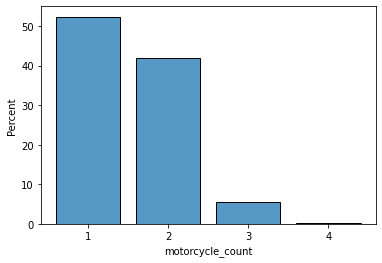

In [32]:
#Q3.3:

ax = sns.histplot(data=df, x='motorcycle_count', stat="percent", discrete=True, shrink=.8)
ticks = ax.set_xticks([1,2,3,4])

In [33]:
#Q3.4:
mean_update = df['update_average'].mean()
std_update = df['update_average'].std()
print('For all policies, analysis on update average mean: {:.0f} and standard deviation: {:.0f}'.format(mean_update, std_update))

For all policies, analysis on update average mean: 92167 and standard deviation: 52213


In [34]:
flat_update = df[df.motorcycle_count == 4][update_cols].values.flatten()
print("For policies with 4 motorcycles insured, mean: {:.0f} and std: \
{:.0f} for updated contract.".format(flat_update.mean(), flat_update.std()))

For policies with 4 motorcycles insured, mean: 113444 and std: 82912 for updated contract.


In [35]:
#Q3.5 :
print("For policies with 4 motorcycles insured, mean: {:.0f} and std: \
{:.0f} for updated contract.".format(df[df.motorcycle_count == 4]['update_average'].mean(), df[df.motorcycle_count == 4]['update_average'].std()))

For policies with 4 motorcycles insured, mean: 113444 and std: 52854 for updated contract.


**Q3.6:**
From 3.4 and 3.5, it shows the mean and standard deviation of updated contract are both higher if we analyze on the motorcycle level. 


### Task 4 — 18pts

Now that we have compressed the kilometrage reported in each contract into a single number, it is time to analyze the 
million-dollar question: *does signing at the top decrease dishonesty?*

1. Considering the updated contracts, calculate the mean and the standard deviation of the average kilometrage in a) 
policies where the signing was done at the bottom; and b) policies where the signing was done at the top. Additionally,
plot the two kilometrage distributions.
2. Determine whether the difference between the two scenarios mentioned in 1. is statistically significant.
3. **Discuss:** Recall that the assignment of the different contracts (*sign at the top* vs. *sign at the bottom*) was 
done at random. According to the results in 1. and 2., does signing at the top decrease dishonesty? 
4.  **Discuss:** Given that no intervention was performed in the baseline contract (i.e., everyone signed at the 
bottom). Would you expect any differences between the average values between *sign at the top* vs. *sign at the bottom*
 conditions for the baseline contract? Note that this is related to columns `baseline_motorcycle[1-4]`.
5. Calculate the mean and the standard deviation for the baseline contracts of the two groups (sign at the top vs. sign 
at the bottom). Additionally, plot the two kilometrage distributions.
6. Determine whether the difference between the two scenarios mentioned in 5. is statistically significant.

---

**Hint:** Recall that the column `condition` encodes the experimental condition in which the customer fell when 
reporting the values shown in columns `update_motorcycle[1-4]`!

**Hint:** To determine if the means of two sets of data are significantly different from each other, you may want to use
 the `ttest_ind` function implemented in the 
 [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). To learn more about 
 Student's t-test, check out this [Wikipedia page](https://en.wikipedia.org/wiki/Student%27s_t-test).

In [36]:
sign_df=pd.DataFrame({'sign_bottom': df[df["condition"]=="Sign Bottom"]['update_average'],
                             'sign_top': df[df["condition"]=="Sign Top"]['update_average']})

In [37]:
print('For all policies signed at the bottom, analysis on update average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_df['sign_bottom'].mean(), sign_df['sign_bottom'].std()))

For all policies signed at the bottom, analysis on update average mean: 98692 and standard deviation: 51928


In [38]:
print('For all policies signed at the top, analysis on update average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_df['sign_top'].mean(), sign_df['sign_top'].std()))

For all policies signed at the top, analysis on update average mean: 85795 and standard deviation: 51704


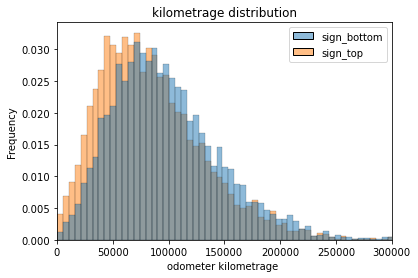

In [39]:
km_distrib_plot = sns.histplot(data=sign_df,stat="frequency")
plt.xlabel("odometer kilometrage ")
plt.title("kilometrage distribution")
plt.xlim(0,3e5)
plt.show(km_distrib_plot)

In [41]:
result1=stats.ttest_ind(sign_df["sign_bottom"],sign_df["sign_top"],nan_policy='omit')
result1.pvalue

5.4353521303099e-47

We can see p-value is < 0.05, so we can reject the null hypothesis H0 that there is not a statistic differences between the two scenarios. So the differences between the two scenarios are statistically significant.

**Q4.3:** 
According to the t-test, we can not say there is not a statistic difference between the two scenarios. So, comparing the means from Q4.1 we can deduce that it can be caused by a decrease of dishonesty signing at the top. 

**Q4.4:** If indeed signing at the top and bottom decrease dishonesty,in this case there should not be any differences between the average values. If there is still any differences, we can suppose, the differences for Q4.3 are not consequence of the signing but other factor.

In [42]:
#Q4.5 :
sign_bottom_bas = df[df.condition=="Sign Bottom"]['baseline_average']
print('For all policies signed at the bottom, analysis on baseline average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_bottom_bas.mean(), sign_bottom_bas.std()))


For all policies signed at the bottom, analysis on baseline average mean: 75021 and standard deviation: 50257


In [43]:
sign_df_bas=pd.DataFrame({'sign_bottom': df[df["condition"]=="Sign Bottom"]['baseline_average'],
                             'sign_top': df[df["condition"]=="Sign Top"]['baseline_average']})

In [44]:
print('For all policies signed at the "bottom", analysis on baseline average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_df_bas['sign_bottom'].mean(), sign_df_bas['sign_bottom'].std()))

For all policies signed at the "bottom", analysis on baseline average mean: 75021 and standard deviation: 50257


In [45]:
print('For all policies signed at the "top", analysis on baseline average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_df_bas['sign_top'].mean(), sign_df_bas['sign_top'].std()))

For all policies signed at the "top", analysis on baseline average mean: 59696 and standard deviation: 49956


In [46]:
sign_top_bas = df[df.condition=="Sign Top"]['baseline_average']
print('For all policies signed at the top, analysis on baseline average mean: \
{:.0f} and standard deviation: {:.0f}'.format(sign_top_bas.mean(), sign_top_bas.std()))

For all policies signed at the top, analysis on baseline average mean: 59696 and standard deviation: 49956


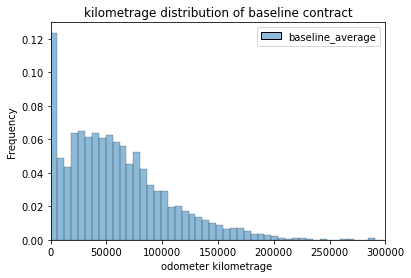

In [47]:
km_bas_distrib_plot = sns.histplot(data=([sign_bottom_bas,sign_top_bas]),stat="frequency")
plt.xlabel("odometer kilometrage ")
plt.title("kilometrage distribution of baseline contract")
plt.xlim(0,3e5)
plt.show(km_bas_distrib_plot)

Text(0, 0.5, 'number of polices')

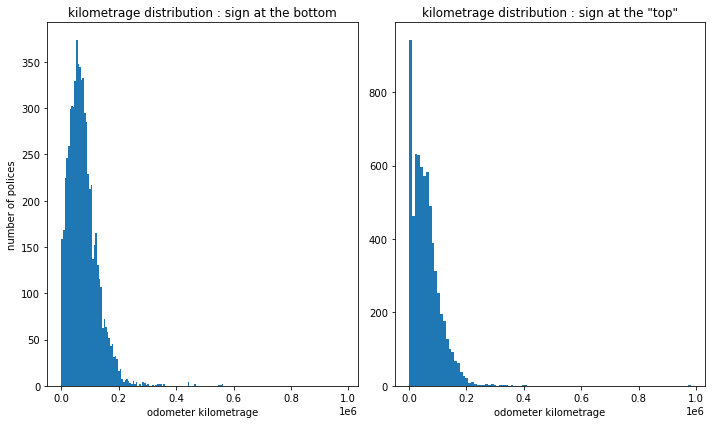

In [48]:
#distributions plot
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(10,6),sharex=True, tight_layout=True)

ax1.hist(sign_bottom_bas,bins=100)
ax1.set_title("kilometrage distribution : sign at the bottom")
ax1.set_xlabel("odometer kilometrage")

ax2.hist(sign_top_bas,bins=100)
ax2.set_title("kilometrage distribution : sign at the " + '"top"')
ax2.set_xlabel("odometer kilometrage")

ax1.set_ylabel("number of polices")

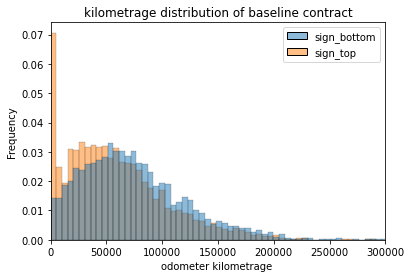

In [49]:
km_bas_distrib_plot = sns.histplot(data=sign_df_bas,stat="frequency")
plt.xlabel("odometer kilometrage ")
plt.title("kilometrage distribution of baseline contract")
plt.xlim(0,3e5)
plt.show(km_bas_distrib_plot)

In [50]:
#Q4.6 : 
result =stats.ttest_ind(sign_bottom_bas,sign_top_bas)
result.pvalue

9.333114026345824e-70

In [51]:
result =stats.ttest_ind(sign_df_bas["sign_bottom"],sign_df_bas["sign_top"],nan_policy='omit')
result.pvalue

9.333114026382688e-70

We can see indeed pvalue <0.05, so the difference is statistically significant. We can conclude that the difference is not caused by the decrease of dishonesty, as there some differences between the two scenarios even if everyone signed at the bottom.

## Interlude: Something is dodgy about this data...

---

Noticing the oddities in the data, you send an email to your contact at the insurance company asking about the integrity
 of the data. Their reply seems like something out of a detective movie:

> Dear researcher, I believe that this data is not to be trusted. I can't talk right now but will send further hints 
>throughout the week.

As a researcher, you know that [data integrity](https://en.wikipedia.org/wiki/Data_integrity) is a big deal, and decide
 to investigate.

### Task 5 — 9pts

The first hint you receive is: *there is something off about the kilometrage values in the data.*

1. For the baseline contract and for the updated contract, plot the distribution of odometer kilometrage reported for 
the first motorcycle insured in each policy. 
2. For the first motorcycle insured by the company in each policy, plot the difference between the number of kilometers
 reported in the baseline and in the updated contract.
3. **Discuss:** why is this data unlikely to have originated from real odometer readings?

---

### Task 6 — 15pts

The second hint you receive is: *there is something off with the last digits of the reported kilometrages.*

1. Considering the baseline kilometrage of the first motorcycle in each contract (`baseline_motorcycle1`), plot the 
distribution of occurrences of the last three digits. Repeat the same for the updated kilometrage of the first 
motorcycle in each contract (`update_motorcycle1`).

3. **Discuss:** What are the differences between the two distributions?

4. **Discuss:** Hypothesize a **plausible** cause for the patterns observed in the digit distribution of the baseline
 kilometrage of the first motorcycle.
    
---

**Hint:** The last two digits of the number 12314 are 314. Note that you should consider the three last digits together,
 not separately!

In [52]:
#Q6.1
base1_last3= df["baseline_motorcycle1"]%1000
base1_last3.head()

0    896
1    396
2    340
3    912
4    862
Name: baseline_motorcycle1, dtype: uint64

In [53]:
updt1_last3= df["update_motorcycle1"]%1000
updt1_last3.head()

0    198
1    511
2    460
3    136
4    292
Name: update_motorcycle1, dtype: uint64

Text(0, 0.5, 'number of occurences')

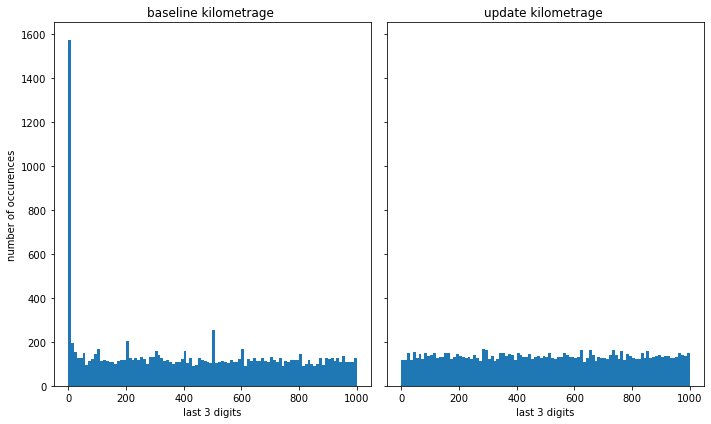

In [54]:
#distribution
fig,(ax1, ax2)= plt.subplots(1,2,figsize=(10,6),sharex=True, sharey=True, tight_layout=True)

ax1.hist(base1_last3,bins=100)
ax1.set_title("baseline kilometrage ")
ax1.set_xlabel("last 3 digits")

ax2.hist(updt1_last3,bins=100)
ax2.set_title("update kilometrage ")
ax2.set_xlabel("last 3 digits")

ax1.set_ylabel("number of occurences")

In [59]:
base1_last3[base1_last3==0].size

1397

**Q6.2:** we see the distribution of the last 3 digits is similar, except for the baseline kilometrage. There is a large amount of kilometrage where the last 3 digits are = 000 (1397 polices!).

**Q6.3:** multiple causes can be the reason of it: some motorcycle1 can be a new purchase, in that case the kilometrage is zero. Other cause could be a round to the lower hundredth of the data during the stockage or processing, in this case the integrity of the data is compromised. We see for the last digit "200","500" and "600", there is more occurences compared with the others, meaning that the second cause is plausible. 

### Task 7 — 15pts

The third (and last) hint you receive is: *there is something wrong with the fonts.*

Your anonymous source explains that the `.tsv` file sent to you was derived from an Excel sheet. There, some of the rows
 were written in the font *Helvetica* while others were written in the font *Arial*. Your anonymous source sends you a 
 file with the relation between policy id and the font used in the respective row (`fonts.csv`), and tells you that the
  rows with *Helvetica* font were fabricated.

1. Load `fonts.csv` and merge the `font` column into your pandas dataframe.
2. Considering only the kilometrage of the first motorcycle in each policy, calculate the number of rows with the Arial 
and the Helvetica font, respectively. Also, plot the distribution of baseline kilometers for rows with the Arial font 
and for rows with the Helvetica font.
3. Similar to what was done in task 6. Plot the distribution of the last three digits for 1) the first motorcycle in 
each baseline contract (`baseline_motorcycle1`); and 2) the first motorcycle in each updated contract
 (`update_motorcycle1`).
4. **Discuss:** Why do these analyses provide evidence that the rows with Helvetica font were fabricated?

---

### Task 8 — 15pts

You've had enough! You decide to write an email to your PI (principal investigator, also known as "your boss") reporting
 the oddities you have observed in the data. Write a (brief) text (in markdown) of up to 300 words. Your text should:

- Use the analyses you did to make a convincing case that the data has been tampered with. 
- Grounded in your analyses, provide a plausible hypothesis about how the data has been tampered with.
- Discuss whether the data leads to the conclusion that signing at the top decreases dishonesty.

Structure your text into three bullets, analogous to the ones above.

You can reference images present in the notebook by indicating a task (e.g., image plotted in Task 3.3) or a cell 
number.

Note that you do not need to conduct any additional analysis to write this text. If you do, the code should be at the 
end of this notebook, i.e., after your answer.

---

**Hint:** The data has been tampered with in more than one way.